# **Seleção**

## Importação das Bibliotecas

In [42]:
import gdown
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Coleta dos Dados

Criamos as variáveis constantes `DATA_URL` e `OUTPUT_PATH` para armazenar, respectivamente, o link dos dados brutos e o caminho no qual eles ficarão armazenados.

In [43]:
DATA_URL = "https://drive.google.com/file/d/1sE-NyGLtPT1EDZ3hKNntGOTCoM-cDfXO/view?usp=sharing"
RAW_DATA_PATH = Path("..") / "data" / "raw" / "poscomp_2016_2022.csv"

Usamos a função `download` da biblioteca **gdown** para realizar o download dos dados brutos.

In [44]:
gdown.download(url=DATA_URL, output=str(RAW_DATA_PATH), fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1sE-NyGLtPT1EDZ3hKNntGOTCoM-cDfXO
To: /home/marcos-araujo/Desktop/repositories/poscomp-classification/data/raw/poscomp_2016_2022.csv
100%|██████████| 2.41M/2.41M [00:00<00:00, 3.89MB/s]


'../data/raw/poscomp_2016_2022.csv'

## Análise Exploratória dos Dados

Usamos a função `read_csv` da biblioteca **pandas** para carregar os dados brutos baixados em um `DataFrame`.

In [45]:
df = pd.read_csv(RAW_DATA_PATH)

Usamos o método `head` para visualizar os primeiros registros.

In [46]:
df.head()

,idade,sexo,estado,presença,cargo,especialidade,algoritmos_e_estruturas_de_dados,analise_combinatoria,analise_de_algoritmos,arquitetura_e_organizacao_de_computadores,...,redes_de_computadores,sistemas_distribuidos,sistemas_operacionais,teoria_dos_grafos,tecnicas_de_programacao,algebra_linear,ano,matematica,fund_computacao,tec_computacao
0,1989-11-29,masculino,ce,s,mestrado/doutorado,teoria da computação,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,3.0,3.0,2.0,2016,14.0,21.0,10.0
1,1995-02-23,masculino,rs,s,mestrado/doutorado,metodologias e técnicas de computação,3.0,2.0,2.0,1.0,...,2.0,3.0,2.0,3.0,3.0,3.0,2016,16.0,22.0,12.0
2,1991-12-13,masculino,sp,s,mestrado/doutorado,engenharia de software,1.0,0.0,2.0,1.0,...,1.0,2.0,2.0,2.0,3.0,1.0,2016,4.0,16.0,8.0
3,1986-09-29,masculino,pa,s,mestrado/doutorado,sistemas de informação,2.0,0.0,1.0,0.0,...,2.0,1.0,0.0,2.0,3.0,1.0,2016,4.0,13.0,7.0
4,1997-12-26,feminino,am,s,mestrado/doutorado,computação gráfica,2.0,1.0,1.0,0.0,...,1.0,3.0,2.0,2.0,3.0,2.0,2016,6.0,15.0,11.0


Usamos o método `info` para visualizar informações gerais sobre os dados.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13997 entries, 0 to 13996
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   idade                                           13997 non-null  object 
 1   sexo                                            13997 non-null  object 
 2   estado                                          13997 non-null  object 
 3   presença                                        13997 non-null  object 
 4   cargo                                           13997 non-null  object 
 5   especialidade                                   13997 non-null  object 
 6   algoritmos_e_estruturas_de_dados                11366 non-null  float64
 7   analise_combinatoria                            11366 non-null  float64
 8   analise_de_algoritmos                           11366 non-null  float64
 9   arquitetura_e_organizacao_de_computador

Usamos o método `describe` para visualizar as estatísticas descritivas gerais dos dados.

In [48]:
df.describe()

,algoritmos_e_estruturas_de_dados,analise_combinatoria,analise_de_algoritmos,arquitetura_e_organizacao_de_computadores,banco_de_dados,calculo_diferencial_e_integral,circuitos_digitais,compiladores,computacao_grafica,engenharia_de_software,...,redes_de_computadores,sistemas_distribuidos,sistemas_operacionais,teoria_dos_grafos,tecnicas_de_programacao,algebra_linear,ano,matematica,fund_computacao,tec_computacao
count,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,...,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,13997.000000,13997.000000,13997.000000,13997.000000
mean,1.636196,1.188369,1.700598,0.918529,0.911490,1.102939,1.241950,0.576632,0.505983,1.051029,...,1.182386,1.755411,0.988298,1.479412,2.183178,1.303977,2017.511610,6.520183,11.351647,6.365578
std,0.955438,0.893527,1.026363,0.783607,0.778447,0.835190,0.857083,0.640388,0.606686,0.894053,...,0.830825,0.898160,0.798781,0.979809,0.726267,0.973777,1.389992,4.287449,6.449095,3.863862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2016.000000,4.000000,9.000000,4.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2017.000000,7.000000,13.000000,7.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2018.000000,9.000000,16.000000,9.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2022.000000,20.000000,28.000000,18.000000


Selecionamos as colunas numéricas e calculamos a média de cada uma.

In [49]:
numeric_columns_df = df.select_dtypes(include="number")
mean_scores_series = numeric_columns_df.mean()
mean_scores_series

algoritmos_e_estruturas_de_dados                     1.636196
analise_combinatoria                                 1.188369
analise_de_algoritmos                                1.700598
arquitetura_e_organizacao_de_computadores            0.918529
banco_de_dados                                       0.911490
calculo_diferencial_e_integral                       1.102939
circuitos_digitais                                   1.241950
compiladores                                         0.576632
computacao_grafica                                   0.505983
engenharia_de_software                               1.051029
geometria_analitica                                  1.023755
inteligencia_artificial                              1.124054
linguagens_de_programacao                            2.045926
linguagens_formais_automatos_e_computabilidade       1.017508
logica_matematica                                    1.326236
matematica_discreta                                  1.241510
organiza

Selecionamos apenas os assuntos e transformamos em um `DataFrame` com a média de acertos por assunto.

In [50]:
avg_score_per_subject_df = mean_scores_series.drop(
    ["ano", "matematica", "fund_computacao", "tec_computacao"],
).reset_index()
avg_score_per_subject_df.columns = ["assunto", "media_de_acertos"]
avg_score_per_subject_df

,assunto,media_de_acertos
0,algoritmos_e_estruturas_de_dados,1.636196
1,analise_combinatoria,1.188369
2,analise_de_algoritmos,1.700598
3,arquitetura_e_organizacao_de_computadores,0.918529
4,banco_de_dados,0.911490
5,calculo_diferencial_e_integral,1.102939
6,circuitos_digitais,1.241950
7,compiladores,0.576632
8,computacao_grafica,0.505983
9,engenharia_de_software,1.051029


Selecionamos apenas os campos e transformamos em um `DataFrame` com a média de acertos por campo. 

In [51]:
avg_score_per_field_df = mean_scores_series.loc[
    ["matematica", "fund_computacao", "tec_computacao"]
].reset_index()
avg_score_per_field_df.columns = ["campo", "media_de_acertos"]
avg_score_per_field_df

,campo,media_de_acertos
0,matematica,6.520183
1,fund_computacao,11.351647
2,tec_computacao,6.365578


Selecionamos apenas as colunas de campos e transformamos o `DataFrame` para o formato longo, de modo que cada registro represente um campo e a quantidade de acertos correspondente.

In [52]:
field_scores_long_df = df[["matematica", "fund_computacao", "tec_computacao"]].melt(
    var_name="campo", value_name="acertos",
)
field_scores_long_df

,campo,acertos
0,matematica,14.0
1,matematica,16.0
2,matematica,4.0
3,matematica,4.0
4,matematica,6.0
...,...,...
41986,tec_computacao,7.0
41987,tec_computacao,6.0
41988,tec_computacao,7.0
41989,tec_computacao,10.0


### Visualização dos Dados

Criamos um gráfico de barras horizontais para visualizar a média de acertos por assunto.

Text(0, 0.5, 'Campo')

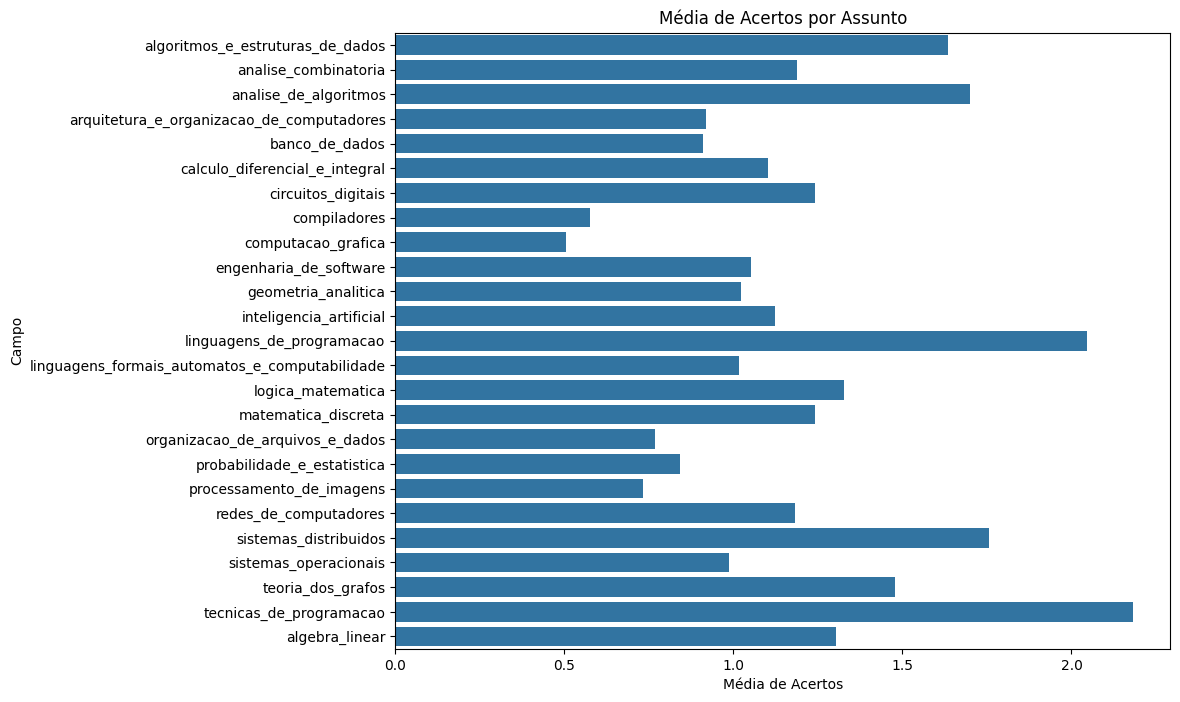

In [56]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(
    data=avg_score_per_subject_df, x="media_de_acertos", y="assunto", orient="h",
)
plt.title("Média de Acertos por Assunto")
plt.xlabel("Média de Acertos")
plt.ylabel("Campo")

Criamos um gráfico de barras verticais para visualizar a média de acertos por campo.

Text(0, 0.5, 'Média de Acertos')

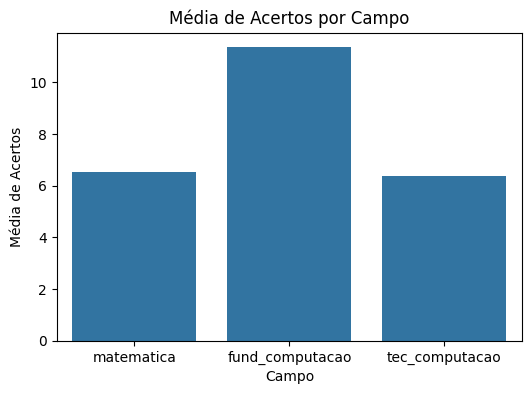

In [54]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=avg_score_per_field_df, x="campo", y="media_de_acertos")
plt.title("Média de Acertos por Campo")
plt.xlabel("Campo")
plt.ylabel("Média de Acertos")

Criamos um boxplot para visualizar a distribuição de acertos por campo.

Text(0, 0.5, 'Campo')

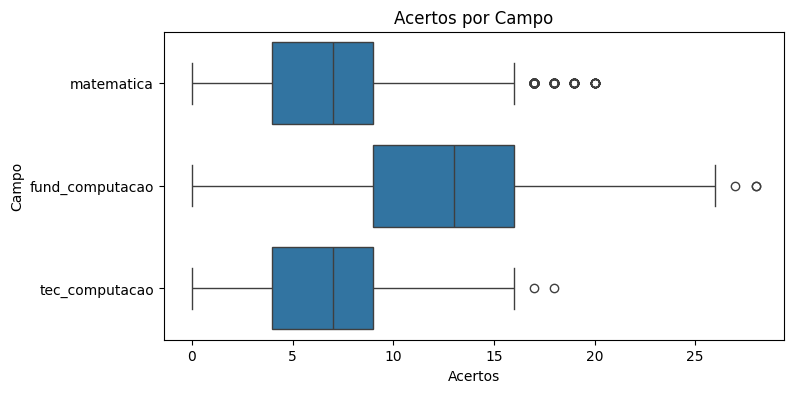

In [55]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=field_scores_long_df, x="acertos", y="campo", orient="h")
plt.title("Acertos por Campo")
plt.xlabel("Acertos")
plt.ylabel("Campo")